In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

## Load data

In [2]:
#Load ------------
df_all = pd.read_csv("coffee_survey.csv")

# Cleaning ---------------

# Replace "NA" with NaN
df_all.replace("NA", pd.NA, inplace=True)

# Split the comma-separated values into separate columns
df_all = df_all.join(df_all['brew'].str.get_dummies(', ').add_prefix("brew_"))
df_all = df_all.join(df_all['additions'].str.get_dummies(', ').add_prefix("add_"))
df_all = df_all.join(df_all['where_drink'].str.get_dummies(', ').add_prefix("where_"))
df_all = df_all.join(df_all['purchase'].str.get_dummies(', ').add_prefix("purch_"))

why_rename = {'It tastes good': 'Taste',
 'It makes me go to the bathroom' : 'To poop',
 'I need the caffeine': 'Caffeine',
 'I need the ritual': 'Ritual' }
df_all = df_all.join(df_all['why_drink'].str.get_dummies(', ').rename(columns=why_rename).add_prefix("why_"))

# number of additions
df_all["add_any milk"] = df_all[["add_Milk", "add_dairy alternative", "add_or coffee creamer"]].mean(axis=1)
df_all["add_total"] = df_all[['add_Cinnamon', 'add_Flavor syrup', 'add_Half & half',
       'add_any milk', 'add_Other', 'add_Sugar or sweetener']].sum(axis=1)

# combine age groups with low sample numbers
age_groups = {'18-24 years old': '18-24', 
              '25-34 years old': '25-34', 
              '35-44 years old': '35-44',
                '55-64 years old': '>45',
                '<18 years old': pd.NA,
                 '>65 years old': '>45',
                 '45-54 years old': '>45'
                 }
df_all["age_dv"] = df_all["age"].map(age_groups)

# combine age groups with low sample numbers
age_groups = {'<18 years old': '1: Gen Z',
              '18-24 years old': '1: Gen Z', 
              '25-34 years old': '2: Y/Millenials', 
              '35-44 years old': '2: Y/Millenials',
              '45-54 years old': '3: X/Boomers',
              '55-64 years old': '3: X/Boomers',
              '>65 years old': '3: X/Boomers'
                 }
df_all["age_dv"] = df_all["age"].map(age_groups)

# spending bands 
most_paid_bands = {'Less than $2':  "<$6",
                    '$4-$6': "<$6", 
                   '$2-$4':"<$6",
                   '$10-$15': ">$10", 
                   '$6-$8': "$6-$8",
                    '$8-$10': '$8-$10',
                  'More than $20': ">$10", 
                  '$15-$20': ">$10" }

df_all["most_paid_dv"] = df_all["most_paid"].map(most_paid_bands)
df_all["most_willing_dv"] = df_all["most_willing"].map(most_paid_bands)

# total spending per month
total_spend_bands  = {'>$100': '>$60', '$40-$60': '$40-$60', '$20-$40':'$20-$40' , '$60-$80': '>$60', '<$20': '<$20', '$80-$100': '>$60'}
df_all["total_spend_dv"] = df_all["total_spend"].map(total_spend_bands)

# no of cups per month
cups_n = {'Less than 1':  0.5,
          '1': 1,
          '2': 2, 
          '3':3,
          '4':4,
          'More than 4': 4.5}
cups_dv = {'Less than 1':  '<1',
          '1': '1',
          '2': '2', 
          '3':'3',
          '4':'4',
          'More than 4': '>4'}

df_all["cups_n"] = df_all["cups"].map(cups_n)
df_all["cups_dv"] = df_all["cups"].map(cups_dv)

In [3]:
#drop rows where data is missing
len(df_all.dropna(how='any', subset=[
    'age', 'cups', 
    'where_drink', 'brew', 
    'favorite', 'additions',  
    'know_source',
    #'dairy', 'sweetener', 'style',
    #'strength', 'roast_level', 'caffeine', 'expertise',
    'total_spend','why_drink', 'most_paid',
    'most_willing', 'value_cafe', 
    #'spent_equipment', 'value_equipment'
    ]))

3155

In [4]:
df = df_all.dropna(how='any', subset=[
    'age', 'cups', 
    'where_drink', 'brew', 
    'favorite', 'additions',  
    'know_source',
    #'dairy', 'sweetener', 'style',
    #'strength', 'roast_level', 'caffeine', 'expertise',
    'total_spend','why_drink', 'most_paid',
    'most_willing', 'value_cafe', 
    #'spent_equipment', 'value_equipment'
    ]).drop(columns=[ 'coffee_a_bitterness', 'coffee_a_acidity',
       'coffee_a_personal_preference', 'coffee_a_notes', 'coffee_b_bitterness',
       'coffee_b_acidity', 'coffee_b_personal_preference', 'coffee_b_notes',
       'coffee_c_bitterness', 'coffee_c_acidity',
       'coffee_c_personal_preference', 'coffee_c_notes', 'coffee_d_bitterness',
       'coffee_d_acidity', 'coffee_d_personal_preference', 'coffee_d_notes',
       'prefer_abc', 'prefer_ad', 'prefer_overall'])

In [7]:
df = df.reset_index(drop=True)
df.to_csv("coffee_survey_data_clean.csv", index=False)

## Explore

In [9]:
df["age_dv"].value_counts()

2: Y/Millenials    2382
3: X/Boomers        427
1: Gen Z            346
Name: age_dv, dtype: int64

In [100]:
df.groupby("age_dv")["where_At a cafe"].value_counts(normalize=True).unstack() 

where_At a cafe,0,1
age_dv,,
1: Gen Z,0.595376,0.404624
2: Y/Millenials,0.684719,0.315281
3: X/Boomers,0.866511,0.133489


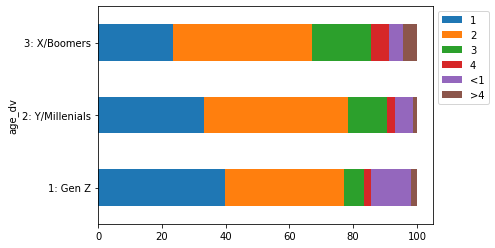

In [81]:
test = df.groupby("age_dv")["cups_dv"].value_counts(normalize=True).unstack() *100

#create stacked bar chart
test.plot(kind='barh', stacked=True)
plt.legend(loc='upper left',  bbox_to_anchor=(1, 1))

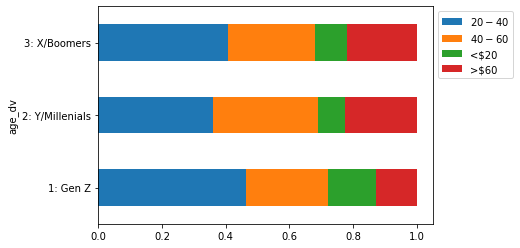

In [99]:
test = df.groupby("age_dv")["total_spend_dv"].value_counts(normalize=True).unstack()

#create stacked bar chart
test.plot(kind='barh', stacked=True)
plt.legend(loc='upper left',  bbox_to_anchor=(1, 1))

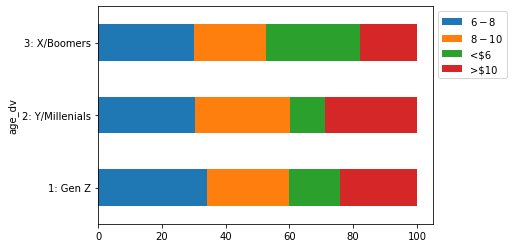

In [82]:
test = df.groupby("age_dv")["most_paid_dv"].value_counts(normalize=True).unstack() *100

#create stacked bar chart
test.plot(kind='barh', stacked=True)
plt.legend(loc='upper left',  bbox_to_anchor=(1, 1))

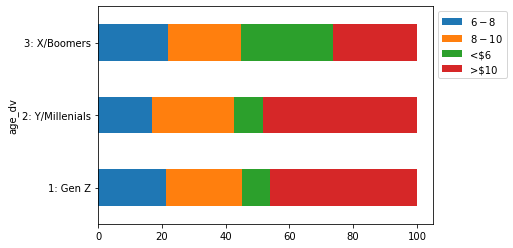

In [83]:
test = df.groupby("age_dv")["most_willing_dv"].value_counts(normalize=True).unstack() *100

#create stacked bar chart
test.plot(kind='barh', stacked=True)
plt.legend(loc='upper left',  bbox_to_anchor=(1, 1))

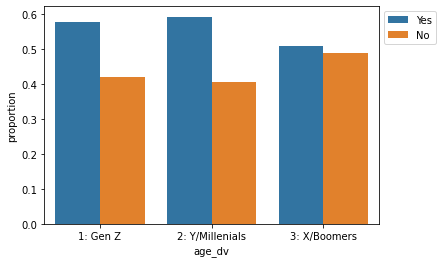

In [84]:
test = df.groupby("age_dv")["value_cafe"].value_counts(normalize=True).to_frame().rename(columns={"value_cafe": "proportion"}).reset_index()
sns.barplot(x='age_dv', y='proportion', hue='value_cafe', data=test) 
plt.legend(loc='upper left',  bbox_to_anchor=(1, 1))

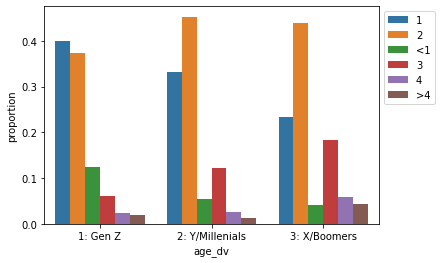

In [85]:
test = df.groupby("age_dv")["cups_dv"].value_counts(normalize=True).to_frame().rename(columns={"cups_dv": "proportion"}).reset_index()
sns.barplot(x='age_dv', y='proportion', hue='cups_dv', data=test) 
plt.legend(loc='upper left',  bbox_to_anchor=(1, 1))

In [87]:
df.groupby("age_dv")["add_Flavor syrup"].value_counts(normalize=True).unstack()

add_Flavor syrup,0,1
age_dv,,
1: Gen Z,0.907514,0.092486
2: Y/Millenials,0.949622,0.050378
3: X/Boomers,0.969555,0.030445


In [88]:
df.groupby("age_dv")["add_dairy alternative"].value_counts(normalize=True).unstack() 

add_dairy alternative,0,1
age_dv,,
1: Gen Z,0.578035,0.421965
2: Y/Millenials,0.597397,0.402603
3: X/Boomers,0.505855,0.494145


In [89]:
df.groupby("age_dv")["know_source"].value_counts(normalize=True).unstack() 

know_source,No,Yes
age_dv,,
1: Gen Z,0.286127,0.713873
2: Y/Millenials,0.193115,0.806885
3: X/Boomers,0.241218,0.758782


In [90]:
df.groupby("age_dv")["brew_Pod/capsule machine (e.g. Keurig/Nespresso)"].value_counts(normalize=True).unstack()

brew_Pod/capsule machine (e.g. Keurig/Nespresso),0,1
age_dv,,
1: Gen Z,0.867052,0.132948
2: Y/Millenials,0.929891,0.070109
3: X/Boomers,0.845433,0.154567


where_At a cafe,0,1
age_dv,,
1: Gen Z,0.595376,0.404624
2: Y/Millenials,0.684719,0.315281
3: X/Boomers,0.866511,0.133489


In [92]:
df.groupby("age_dv")["spent_equipment"].value_counts(normalize=True).unstack() 

spent_equipment,$100-$300,$20-$50,$300-$500,$50-$100,$500-$1000,Less than $20,"More than $1,000"
age_dv,,,,,,,
1: Gen Z,0.260234,0.073099,0.134503,0.134503,0.160819,0.087719,0.149123
2: Y/Millenials,0.204890,0.044266,0.187605,0.079680,0.193929,0.041315,0.248314
3: X/Boomers,0.272300,0.053991,0.145540,0.084507,0.178404,0.046948,0.218310


In [93]:
df.groupby("age_dv")["add_No - just black"].value_counts(normalize=True).unstack() 

add_No - just black,0,1
age_dv,,
1: Gen Z,0.332370,0.667630
2: Y/Millenials,0.290092,0.709908
3: X/Boomers,0.459016,0.540984


In [94]:
df.groupby("age_dv")["why_Taste"].value_counts(normalize=True).unstack() 

why_Taste,0,1
age_dv,,
1: Gen Z,0.037572,0.962428
2: Y/Millenials,0.032326,0.967674
3: X/Boomers,0.096019,0.903981


In [95]:
df.groupby("age_dv")["why_To poop"].value_counts(normalize=True).unstack() 

why_To poop,0,1
age_dv,,
1: Gen Z,0.832370,0.167630
2: Y/Millenials,0.858102,0.141898
3: X/Boomers,0.941452,0.058548


In [96]:
df.groupby("age_dv")["why_Caffeine"].value_counts(normalize=True).unstack() 

why_Caffeine,0,1
age_dv,,
1: Gen Z,0.459538,0.540462
2: Y/Millenials,0.400924,0.599076
3: X/Boomers,0.524590,0.475410


In [97]:
df.groupby("age_dv")["why_Ritual"].value_counts(normalize=True).unstack() 

why_Ritual,0,1
age_dv,,
1: Gen Z,0.482659,0.517341
2: Y/Millenials,0.403862,0.596138
3: X/Boomers,0.583138,0.416862


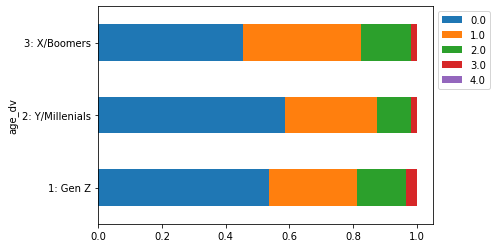

In [98]:
test = df.groupby("age_dv")["add_total"].value_counts(normalize=True).unstack() 

#create stacked bar chart
test.plot(kind='barh', stacked=True)
plt.legend(loc='upper left',  bbox_to_anchor=(1, 1))

In [23]:
df.columns

Index(['submission_id', 'age', 'cups', 'where_drink', 'brew', 'brew_other',
       'purchase', 'purchase_other', 'favorite', 'favorite_specify',
       'additions', 'additions_other', 'dairy', 'sweetener', 'style',
       'strength', 'roast_level', 'caffeine', 'expertise',
       'coffee_a_bitterness', 'coffee_a_acidity',
       'coffee_a_personal_preference', 'coffee_a_notes', 'coffee_b_bitterness',
       'coffee_b_acidity', 'coffee_b_personal_preference', 'coffee_b_notes',
       'coffee_c_bitterness', 'coffee_c_acidity',
       'coffee_c_personal_preference', 'coffee_c_notes', 'coffee_d_bitterness',
       'coffee_d_acidity', 'coffee_d_personal_preference', 'coffee_d_notes',
       'prefer_abc', 'prefer_ad', 'prefer_overall', 'wfh', 'total_spend',
       'why_drink', 'why_drink_other', 'taste', 'know_source', 'most_paid',
       'most_willing', 'value_cafe', 'spent_equipment', 'value_equipment',
       'gender', 'gender_specify', 'education_level', 'ethnicity_race',
       'ethnici

In [24]:
df.groupby("age_dv")["cups_dv"].describe()

,count,unique,top,freq
age_dv,,,,
18-24,334,6,1,135
25-34,1611,6,2,720
35-44,772,6,2,359
>45,428,6,2,187


In [ ]:
 'why_Caffeine',
       'why_Ritual', 'why_To poop', 'why_Taste'